In [27]:
import h5py
import numpy as np
from lv17analysis import opal, lv17data
from h5analysis import h5data
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage.filters import gaussian_filter
from lv17analysis import detectors, helpers

# Calibration

## Create calib data from h5 (already done - see readout below)

In [28]:
# from lv17analysis import helpers
# from h5analysis import h5data
# import os


# def gmd_filter(gmd, gmd_range=None):
#     gmd_co = np.max([np.nanmedian(gmd)/5, 0.005])
#     gmd_vals = gmd[np.asarray(gmd) > gmd_co]

#     if gmd_range is None:
#         gmd_mean = np.nanmedian(gmd_vals)
#         gmd_var = np.nanvar(gmd_vals)
#         gmd_range = np.asarray([gmd_mean-np.sqrt(gmd_var),
#                                  gmd_mean+np.sqrt(gmd_var)])

#     filt = gmd >= gmd_range[0]
#     filt *= gmd <= gmd_range[1]

#     return filt, gmd_vals, gmd_range


# def calc_opal_mean(opal_img, xgmd):
#     n, rows, cols = np.shape(opal_img)
#     opal_sum = np.zeros((rows, cols), dtype=np.float64)
#     for i in np.arange(n):
#         opal_sum += opal_img[i,:,:] / xgmd[i]

#     return opal_sum / n


# opal_data = {}

# nmax = 1000
# k_movmean = 5
# cmap = 'magma'
# opal_dict = {}
# pad_px = 4
# h5path = '/cds/home/u/ulmer/lv17data/hdf5/smalldata'
# gmd_ranges = {'xleap': np.asarray([0.05, 0.15]), 'sase': np.asarray([1.329, 1.788])}

# for pulse_cat in ['xleap', 'sase']:
#     runs_ni_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out']
#     runs_ni_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in']
#     hv_nominal = lv17data.spectrometer_run_dict[pulse_cat+'_calib_nominal_energy']

#     opal_dict[pulse_cat+'_calib_ni_out'] = {}
#     opal_dict[pulse_cat+'_calib_ni_out'][0] = {}
#     opal_dict[pulse_cat+'_calib_ni_out'][1] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'][0] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'][1] = {}

#     for i_run in range(2):
#         run_out = runs_ni_out[i_run]
#         run_in = runs_ni_in[i_run]

#         fig = plt.figure(figsize=(6,3))

#         for io_run, run in enumerate([run_out, run_in]):

#             # fn = os.path.join(h5data.h5paths['smd'], 'opal', "r{:03d}_opal.h5".format(run))
#             fn = os.path.join(h5path, "r{:03d}_opal.h5".format(run))
#             print(fn)
#             with h5py.File(fn, 'r') as f:

#                 gmd_range = np.asarray(gmd_ranges[pulse_cat])
#                 filt, gmd_vals, gmd_range = gmd_filter(f['gmd'], gmd_range)
#                 print('gmd range = ({:.3f}, {:.3f})'.format(gmd_range[0], gmd_range[1]))
#                 filt *= ~np.isnan(f['photon_energy'])
#                 idc = np.nonzero(filt)[0]
#                 if nmax is not None:
#                     idc = idc[0:nmax]

#                 hv_mean = np.nanmean(f['photon_energy'][idc])
#                 xgmd = f['xgmd'][idc]
#                 opal_img = calc_opal_mean(f['spectrometer'][idc,:,:], f['xgmd'][idc])
#                 # opal_img = np.nanmean(f['spectrometer'][idc,:,:]/xgmd[:,None,None], axis=0)

#                 if io_run == 0:
#                     center_px = opal.get_center_px(opal_img)
#                 roi_img = opal.roi_from_img(opal_img, center_px=center_px, pad_px=pad_px)
#                 spec = opal.spec_from_img(opal_img, center_px=center_px, pad_px=pad_px)
#                 spec_movmean = helpers.movmean(spec, k=k_movmean)

#                 plt.hist(gmd_vals, bins=60, label='run {:03d}'.format(run), alpha=0.7)
#                 plt.axvline(np.mean(gmd_range), c='tab:red', lw=2, ls='--', alpha=0.75)
#                 plt.axvline(gmd_range[0], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
#                 plt.axvline(gmd_range[1], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
#                 plt.grid()


            # iostr = 'in' if io_run == 1 else 'out'
            # opal_dict[pulse_cat+'_calib_ni_'+iostr][i_run] = {
            #     'run': run,
            #     'opal_img': opal_img,
            #     'center_px': center_px,
            #     'roi_img': roi_img,
            #     'spectrum': spec,
            #     'spectrum_movmean': spec_movmean,
            #     'nominal_energy': hv_mean,
            #     'gmd_vals': gmd_vals,
            #     'gmd_range': gmd_range}

#         plt.legend(title=pulse_cat)


#         fig = plt.figure(figsize=(15,5))
#         fig.add_subplot(1,3,1)
#         plt.pcolormesh(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['roi_img'], cmap=cmap)
#         fig.add_subplot(1,3,2)
#         plt.pcolormesh(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['roi_img'], cmap=cmap)
#         fig.add_subplot(1,3,3)
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['spectrum'], ':', lw=2,
#                  label="run {:d}, Ni out".format(run_out))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['spectrum'], ':', lw=2,
#                  label="run {:d}, Ni in".format(run_in))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['spectrum_movmean'], '-', lw=.5,
#                  label="movmean of run {:d}, Ni out".format(run_out))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['spectrum_movmean'], '-', lw=.5,
#                  label="movmean of run {:d}, Ni in".format(run_in))
#         plt.legend(title="{:.1f} eV".format(hv_nominal[i_run]))


### Write calib data to h5 (already done - see readout below)

In [29]:
# fn = os.path.join(h5data.h5paths['h5'], 'opal/spectrometer_ni_calib.h5')

# with h5py.File(fn, 'w') as f:
#     for pulse_cat in ['xleap', 'sase']:
#         runs_ni_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out']
#         runs_ni_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in']
#         hv_nominal = lv17data.spectrometer_run_dict[pulse_cat+'_calib_nominal_energy']

#         for iostr in ["in", "out"]:
#             k = pulse_cat+'_calib_ni_'+iostr
#             g = f.create_group(k)
#             for key in opal_dict[k][0].keys():
#                 data = np.asarray([opal_dict[k][0][key], opal_dict[k][1][key]])
#                 d = g.create_dataset(key, data=data)

# # Test Readout
# with h5py.File(fn, 'r') as f:
#     print(f['sase_calib_ni_in'].keys())
#     print(f['sase_calib_ni_in']['spectrum'])
#     print(f['sase_calib_ni_in']['spectrum'][0])

### Read calib data from h5

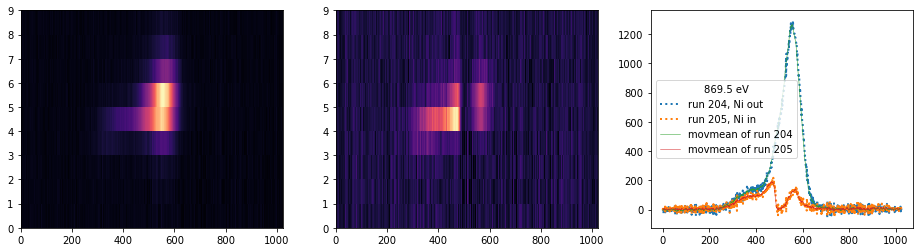

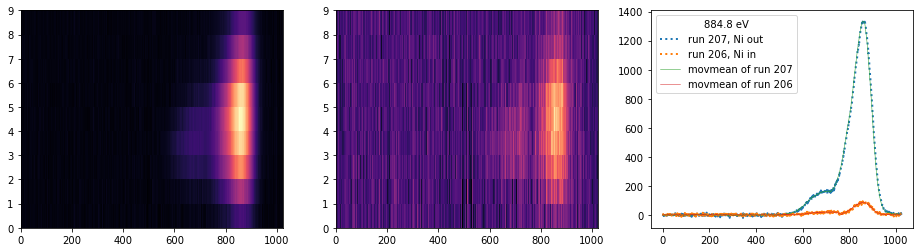

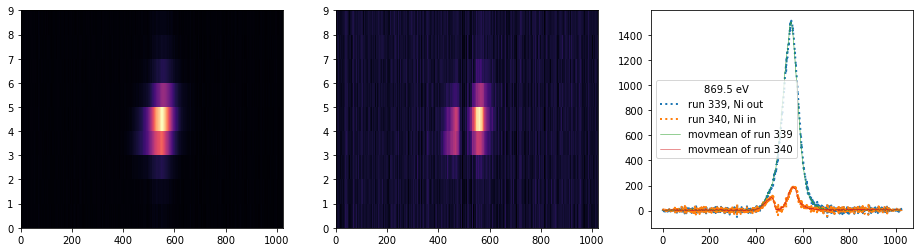

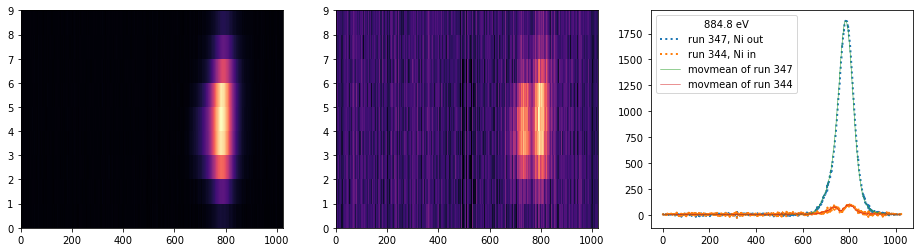

In [30]:
from lv17analysis import helpers
from h5analysis import h5data
import os

fn = os.path.join(h5data.h5paths['h5'], 'opal/spectrometer_ni_calib.h5')

with h5py.File(fn, 'r') as f:
    od = {}
    for pulse_cat in ['xleap', 'sase']:
        runs_ni_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out']
        runs_ni_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in']
        hv_nominal = lv17data.spectrometer_run_dict[pulse_cat+'_calib_nominal_energy']

        for iostr in ["in", "out"]:
            k = pulse_cat+'_calib_ni_'+iostr
            od[k] = {0: {}, 1: {}}
            for i, key in enumerate(f[k].keys()):
                for i_run in range(2):
                    od[k][i_run][key] = f[k][key][i_run]



cmap = 'magma'

for pulse_cat in ['xleap', 'sase']:
    runs_ni_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out']
    runs_ni_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in']

    for i_run in range(2):
        run_out = runs_ni_out[i_run]
        run_in = runs_ni_in[i_run]

        fig = plt.figure(figsize=(16,4))
        fig.add_subplot(1,3,1)
        plt.pcolormesh(od[pulse_cat+'_calib_ni_out'][i_run]['roi_img'], cmap=cmap)
        fig.add_subplot(1,3,2)
        plt.pcolormesh(od[pulse_cat+'_calib_ni_in'][i_run]['roi_img'], cmap=cmap)
        fig.add_subplot(1,3,3)
        plt.plot(od[pulse_cat+'_calib_ni_out'][i_run]['spectrum'], ':', lw=2,
                 label="run {:d}, Ni out".format(run_out))
        plt.plot(od[pulse_cat+'_calib_ni_in'][i_run]['spectrum'], ':', lw=2,
                 label="run {:d}, Ni in".format(run_in))
        plt.plot(od[pulse_cat+'_calib_ni_out'][i_run]['spectrum_movmean'], '-', lw=.5,
                 label="movmean of run {:d}".format(run_out))
        plt.plot(od[pulse_cat+'_calib_ni_in'][i_run]['spectrum_movmean'], '-', lw=.5,
                 label="movmean of run {:d}".format(run_in))
        plt.legend(title="{:.1f} eV".format(hv_nominal[i_run]))


# Spectrum Calibration

## Comparing Savitzki-Golay-Filter with MovMean and Gaussian Filter

<Figure size 2160x576 with 0 Axes>

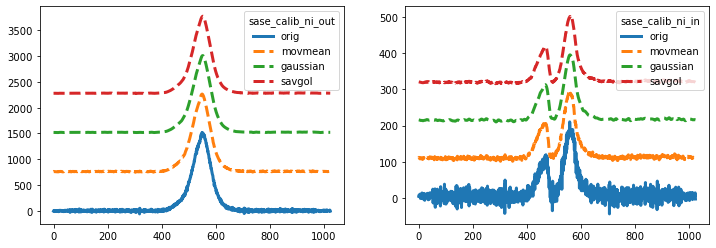

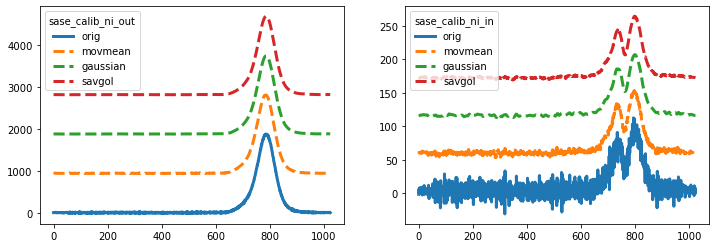

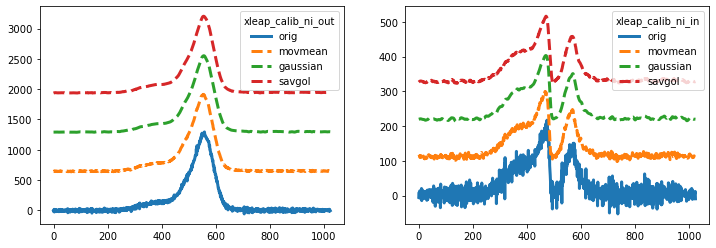

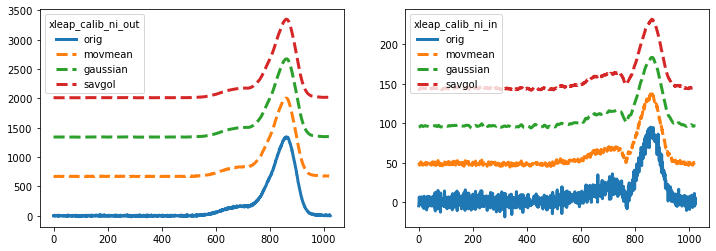

In [31]:
from scipy import signal


def filter_savgol(y, window_length=29, polyorder=3):
    return signal.savgol_filter(y, window_length=window_length, polyorder=polyorder)

def movmean(y, k=3):
    return np.convolve(y, np.ones_like(np.arange(k)), 'valid') / k


# y_smooth = signal.savgol_filter(y, window_length=11, polyorder=3, mode="nearest")

fig = plt.figure(figsize=(30,8))

for pulse_cat in ['sase', 'xleap']:
    for i_run in [0, 1]:
        fig, ax = plt.subplots(1,2,figsize=(12,4))
        for i_io, outin in enumerate(['_calib_ni_out', '_calib_ni_in']):
            # plt.figure(figsize=(10,5))

            y = od[pulse_cat+outin][i_run]['spectrum']
            # y[0:30] = np.nan
            # y[-30:] = np.nan
            y -= np.nanmedian(y[y < np.nanmedian(y)])
            # y -= np.nanmin(y)
            # y -= np.nanmedian(y[y <= 5])
            y_savgol = filter_savgol(y)

            od[pulse_cat+outin][i_run]['spectrum_movmean'] = movmean(y, 5)
            od[pulse_cat+outin][i_run]['spectrum_savgol'] = y_savgol
            od[pulse_cat+outin][i_run]['spectrum_gaussian'] = gaussian_filter(
                y, 3)


            # PLOTTING
            spec_list = ['movmean', 'gaussian', 'savgol']

            y = od[pulse_cat+outin][i_run]['spectrum']
            y_offs = np.max(y) / 2
            ax[i_io].plot(y,
                    label='orig', lw=3)
            for i_plt, spec_str in enumerate(spec_list):
                y = od[pulse_cat+outin][i_run]['spectrum_'+spec_str]
                ax[i_io].plot(y + y_offs*(i_plt+1),
                              label=spec_str, lw=3, linestyle='--')

            ax[i_io].legend(title=pulse_cat+outin)


## Ni absorption spectra

<Figure size 576x576 with 0 Axes>

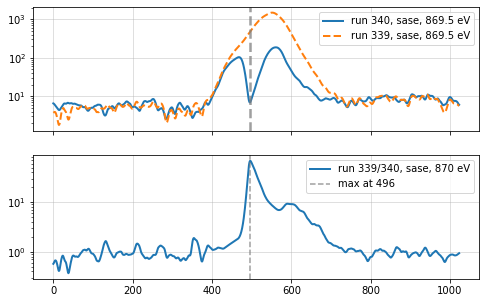

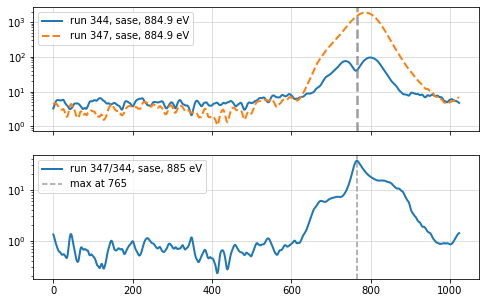

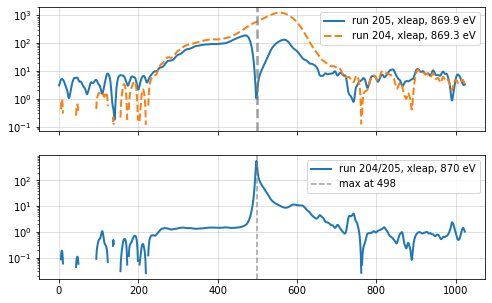

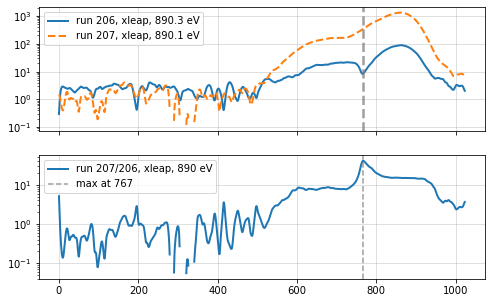

In [32]:
spec_key = 'spectrum_gaussian'
spec_key = 'spectrum_savgol'
offs = 1
co = 0.1
fig = plt.figure(figsize=(8,8))
lw = 2

def rebin_data(data, binsize=5):
    imax = len(data) - len(data) % binsize
    d = np.zeros((int(imax/binsize), binsize))#data[:imax:binsize])
    for i in np.arange(0, binsize):
        d[:,i] = np.asarray(data[i:imax:binsize])

    return np.nansum(d, axis=1)



for pulse_cat in ['sase', 'xleap']:
    
    od[pulse_cat+'_calib_ratio'] = {}
    
    for i_run in [0, 1]:
        y_in = od[pulse_cat+'_calib_ni_in'][i_run][spec_key]
        y_out = od[pulse_cat+'_calib_ni_out'][i_run][spec_key]
        run_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in'][i_run]
        run_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out'][i_run]
        hv_in = od[pulse_cat+'_calib_ni_in'][i_run]['nominal_energy']
        hv_out = od[pulse_cat+'_calib_ni_out'][i_run]['nominal_energy']

        b = np.zeros((2, len(y_in)))
        b[1] = np.copy(y_in)
        b[0] = np.copy(y_out)

        for io in [0,1]:
            # bio = b[io]
            # bio -= np.nanmedian(bio[bio <= 1])
            # b[io] -= np.nanmedian(b[io][b[io]<=2])
            b[io] = gaussian_filter(b[io], 2)
            # b[io] -= np.nanmedian(b[io][b[io] < 2*np.nanmedian(b[io])])
            # b[io] -= np.nanmin(b[io])

            b[io] += offs
            b[io][b[io]<=co] = np.nan

        b_ratio = b[0]/b[1]
        # b_ratio = signal.savgol_filter(b_ratio, window_length=29, polyorder=3)
        # b_ratio = gaussian_filter(b_ratio, 5)
        log_ratio = np.log(b_ratio)

        hv_mean = np.mean([hv_out, hv_in])

        max_pos = np.nanargmax(b_ratio)
        max_val = np.nanmax(b_ratio)

        fig, ax = plt.subplots(2,1,figsize=(8,5),sharex=True)
        ax[0].semilogy(b[1], label='run {:d}, {}, {:.1f} eV'.format(
            run_in, pulse_cat, hv_in), linestyle='-', lw=lw)
        ax[0].plot(b[0], label='run {:d}, {}, {:.1f} eV'.format(
            run_out, pulse_cat, hv_out), linestyle='--', lw=lw)
        ax[0].legend()
        ax[0].grid(True, alpha=.5)
        ax[0].axvline(max_pos,
                    c='tab:gray', lw=2.5, ls='--', alpha=0.75)

        ax[1].semilogy(b_ratio, label='run {:d}/{:d}, {}, {:.0f} eV'.format(
            run_out, run_in, pulse_cat, hv_mean), linestyle='-', lw=lw)
        ax[1].axvline(max_pos,
                    c='tab:gray', lw=lw-.5, ls='--', alpha=0.75, label='max at {:d}'.format(
                    max_pos))
        ax[1].legend()
        ax[1].grid(True, alpha=.5)


        od[pulse_cat+'_calib_ratio'][i_run] = {
                'ratio': np.copy(b_ratio),
                'max_pos': max_pos,
                'max_val': max_val,
                'nominal_energy': hv_mean,
                'nominal_hv_out': hv_out,
                'nominal_hv_in': hv_in,
                'runs_out_in': [run_out, run_in]}


## Calibration results

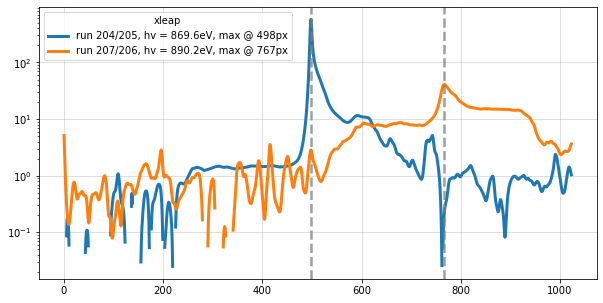

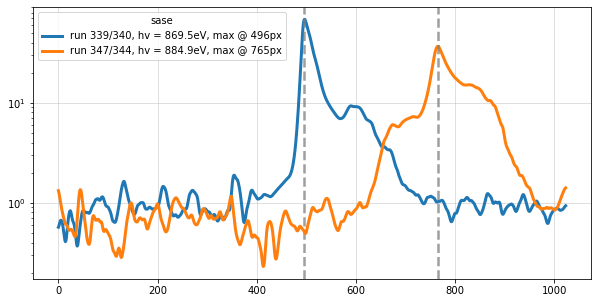

In [33]:

for pulse_cat in ['xleap', 'sase']:
    fig = plt.figure(figsize=(10,5))

    for i_run in [0, 1]:
        ratio = od[pulse_cat+'_calib_ratio'][i_run]['ratio']
        max_pos = od[pulse_cat+'_calib_ratio'][i_run]['max_pos']
        max_val = od[pulse_cat+'_calib_ratio'][i_run]['max_val']
        hv = od[pulse_cat+'_calib_ratio'][i_run]['nominal_energy']
        run_out, run_in = od[pulse_cat+'_calib_ratio'][i_run]['runs_out_in']


        plt.semilogy(ratio, linestyle='-', lw=3,
                     label='run {:d}/{:d}, hv = {:.1f}eV, max @ {:}px'.format(
                         run_out, run_in, hv, max_pos))
        plt.axvline(max_pos,
                c='tab:gray', lw=2.5, ls='--', alpha=0.75)


    plt.legend(title='{}'.format(pulse_cat))
    plt.grid(True, alpha=.5)


## Calibration fit

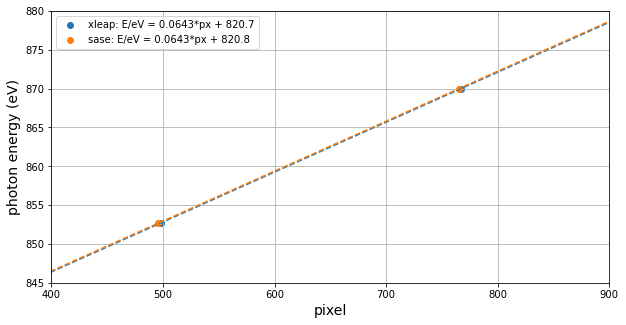

In [34]:
from scipy.optimize import curve_fit

pixels = [214,445,622]
energies = [852.7,870.0]
px = np.arange(1024)+1

def line(m,x,b):
    return m*x+b

fig, ax = plt.subplots(1,1,figsize=(10,5))
# plt.subplots(2,1,figsize=(16,10),sharex=True)

for pulse_cat in ['xleap', 'sase']:

    pixels = [od[pulse_cat+'_calib_ratio'][0]['max_pos'],
              od[pulse_cat+'_calib_ratio'][1]['max_pos']]
    hv_nominal = [od[pulse_cat+'_calib_ratio'][0]['nominal_energy'],
                  od[pulse_cat+'_calib_ratio'][1]['nominal_energy']]

    popt, pcov = curve_fit(line,pixels,energies)
    offset = popt[1]
    scale = popt[0]

    popt, pcov = curve_fit(line,hv_nominal,energies)
    hv_offset = popt[1]
    hv_scale = popt[0]
    hv_x = np.arange(800,900+1)

    od[pulse_cat+'_calib_data'] = {
        'ev_per_px': scale,
        'ev_offset': offset,
        'ev_per_nom_ev': hv_scale,
        'ev_nom_offset': hv_offset}

    ax.scatter(pixels, energies, label='{}: E/eV = {:.4f}*px + {:.1f}'.format(
        pulse_cat, scale, offset))
    ax.plot(px, offset + px*scale, '--')


ax.legend()
ax.set_xlabel('pixel',fontsize=14)
ax.set_ylabel('photon energy (eV)',fontsize=14)
ax.set_xlim(400,900)
ax.set_ylim(845,880)
ax.grid(True)


# Create run averaged spectra from opal detector image

## Read data from psana datasource (slow)

In [35]:
# import h5py
# import numpy as np
# from lv17analysis import opal, lv17data
# import os
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm

# spectra = {}

# for pulse_cat in ['xleap', 'sase']:
#     run_dict = lv17data.spectrometer_run_dict
#     spectra[pulse_cat] = {}
#     run_list = run_dict[pulse_cat]

#     for i_run, run in enumerate(run_list):
#         print('run {}'.format(run))
#         spec, hv = opal.run_mean_spec(run=run, nmax=nmax)
#         spectra[pulse_cat][run] = {
#             'run': run,
#             'hv_nominal': hv,
#             'spectrum': spec}

# # fig = plt.figure(figsize=(8,5))
# # key_array = []
# # run_array = []
# # spec_array = []
# # hv_array = []

# # for pulse_cat in ['xleap', 'sase']:
# #     spectra
# #     for keys in spectra[pulse_cat].keys():
# #         key, run = keys
# #         spec = spectra[pulse_cat][keys]
# #         key_array.append(key)
# #         run_array.append(run)
# #         spec_array.append(spec)
# #         hv_array.append(hv)
# #         plt.plot(spec, label="r{:03d}: {}".format(run, key))

# #     plt.legend()

## Read data from hits h5 (already done - see readout below)

In [36]:
# import h5py
# import numpy as np
# from lv17analysis import opal, lv17data
# from h5analysis import h5data
# import h5py
# import os
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm


# def calc_opal_mean(opal_img, xgmd):
#     n, rows, cols = np.shape(opal_img)
#     opal_sum = np.zeros((rows, cols), dtype=np.float64)
#     for i in np.arange(n):
#         opal_sum += opal_img[i,:,:] / xgmd[i]

#     return opal_sum / n


# def gmd_filter(gmd, gmd_range=None, nsigma=1):
#     gmd_co = np.nanmedian(gmd[np.asarray(gmd) > 0.1])/5
#     gmd_vals = gmd[np.asarray(gmd) > gmd_co]

#     if gmd_range is None:
#         gmd_mean = np.nanmedian(gmd_vals)
#         gmd_var = np.nanvar(gmd_vals)
#         gmd_sigma = np.sqrt(gmd_var)
#     else:
#         gmd_mean = np.mean(gmd_range)
#         gmd_sigma = (gmd_range[1] - gmd_range[0])/2

#     gmd_range = np.asarray([gmd_mean - nsigma*gmd_sigma,
#                              gmd_mean + nsigma*gmd_sigma])

#     filt = gmd >= gmd_range[0]
#     filt *= gmd <= gmd_range[1]

#     return filt, gmd_vals, gmd_range


# spectra = {}
# nmax = 1000
# pad_px = 4
# k_movmean = 5
# gmd_ranges = {'xleap': np.asarray([0.05, 0.15]), 'sase': np.asarray([1.329, 1.788])}
# skip_runs = [294, 446, 284, 224, 349]

# for pulse_cat in ['xleap', 'sase']:
#     run_dict = lv17data.spectrometer_run_dict
#     spectra[pulse_cat] = {}
#     run_list = run_dict[pulse_cat]

#     for i_run, run in enumerate(run_list):
#         if run in skip_runs:
#             continue

#         fn = os.path.join(h5data.h5paths['smd'],
#                               "r{:03d}_opal.h5".format(run))
#         print(fn)
#         with h5py.File(fn, 'r') as f:

#             gmd_range = gmd_ranges[pulse_cat]
#             # gmd_range = None
#             filt, gmd_vals, gmd_range = gmd_filter(f['gmd'], gmd_range=gmd_range,
#                                                    nsigma=.5)
#             gmd_range_str = 'gmd range = ({:.3f}, {:.3f})'.format(
#                 gmd_range[0], gmd_range[1])
#             print(gmd_range_str)
#             filt *= ~np.isnan(f['photon_energy'])
#             idc = np.nonzero(filt)[0]
#             if nmax is not None:
#                 idc = idc[0:nmax]

#             plt.figure(figsize=(6,3))
#             plt.hist(gmd_vals, bins=60, label='run {:03d}'.format(run), alpha=0.7)
#             plt.axvline(np.mean(gmd_range), c='tab:red', lw=2, ls='--', alpha=0.75,
#                        label=gmd_range_str)
#             plt.axvline(gmd_range[0], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
#             plt.axvline(gmd_range[1], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
#             # plt.grid()
#             plt.legend()
#             plt.show()


#             hv_mean = np.nanmean(f['photon_energy'][idc])
#             xgmd = f['xgmd'][idc]
#             opal_img = calc_opal_mean(f['spectrometer'][idc,:,:], xgmd)

#             center_px = opal.get_center_px(opal_img)
#             roi_img = opal.roi_from_img(opal_img, center_px=center_px, pad_px=pad_px)
#             spec = opal.spec_from_img(opal_img, center_px=center_px, pad_px=pad_px)
#             spec_movmean = helpers.movmean(spec, k=k_movmean)

#             y = np.copy(spec)
#             y -= np.nanmedian(y[y < np.nanmedian(y)])
#             spec_savgol = filter_savgol(y)
#             spec_gaussian = gaussian_filter(y, 3)

#             spectra[pulse_cat][run] = {
#                 'run': run,
#                 'hv_nominal': hv_mean,
#                 'opal_img': opal_img,
#                 'roi_img': roi_img,
#                 'center_px': center_px,
#                 'spectrum': spec,
#                 'spectrum_movmean': spec_movmean,
#                 'spectrum_savgol': spec_savgol,
#                 'spectrum_gaussian': spec_gaussian,
#                 'gmd_vals': gmd_vals,
#                 'gmd_range': gmd_range}


### Write to h5 data

In [37]:
# fn = os.path.join(h5data.h5paths['h5'], 'opal/spectrometer_calib.h5')

# with h5py.File(fn, 'w') as f:
#     for pulse_cat in ['xleap', 'sase']:
#         g = f.create_group(pulse_cat)
#         keys = spectra[pulse_cat].keys()
#         # dd = {}
#         for i, item in enumerate(spectra[pulse_cat].items()):
#             k = str(item[0])
#             g2 = g.create_group(k)
#             for key, val in item[1].items():
#                 data = np.asarray(val)
#                 g2.create_dataset(key, data=data)


### Read results from h5 data

<KeysViewHDF5 ['sase', 'xleap']>
<KeysViewHDF5 ['sase', 'xleap']>


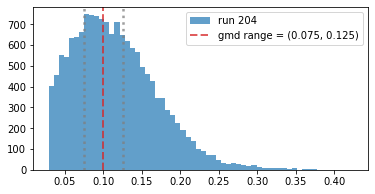

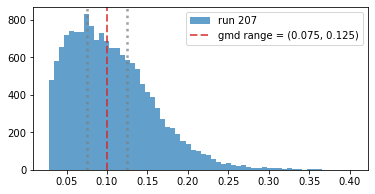

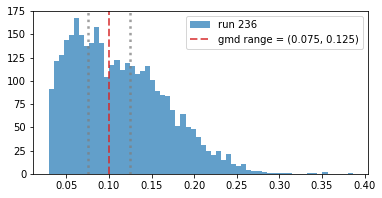

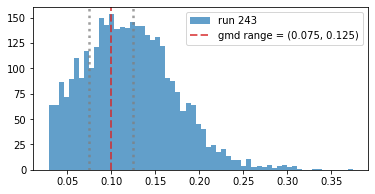

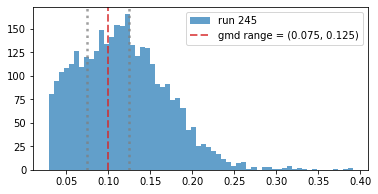

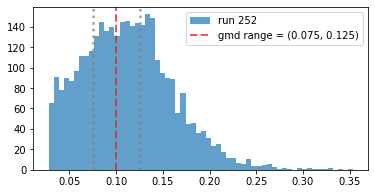

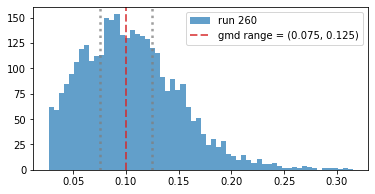

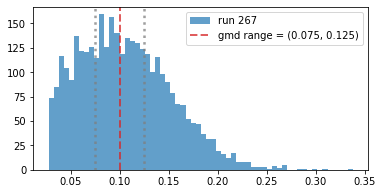

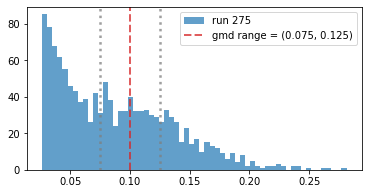

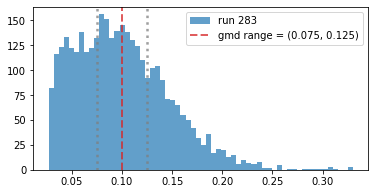

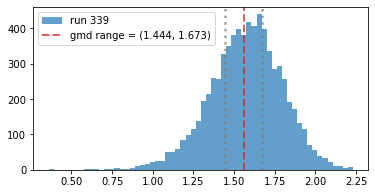

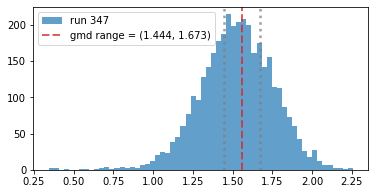

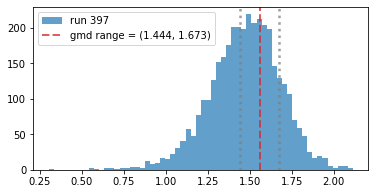

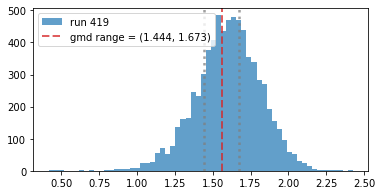

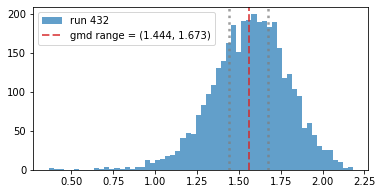

In [38]:
fn = os.path.join(h5data.h5paths['h5'], 'opal/spectrometer_calib.h5')

with h5py.File(fn, 'r') as f:
    s = {'xleap': {}, 'sase': {}}
    for pulse_cat in ['xleap', 'sase']:
        print(f.keys())
        for k in f[pulse_cat].keys():
            s[pulse_cat][int(k)] = {}
            for key, val in f[pulse_cat][k].items():
                s[pulse_cat][int(k)][key] = np.asarray(val)


for pulse_cat in ['xleap', 'sase']:
    for run in s[pulse_cat].keys():
        ss = s[pulse_cat][run]
        hv_mean = ss['hv_nominal']
        opal_img = ss['opal_img']
        roi_img = ss['roi_img']
        center_px = ss['center_px']
        spec = ss['spectrum']
        spec_movmean = ss['spectrum_movmean']
        spec_savgol= ss['spectrum_savgol']
        spec_gaussian = ss['spectrum_gaussian']
        gmd_vals = ss['gmd_vals']
        gmd_range = ss['gmd_range']


        plt.figure(figsize=(6,3))
        plt.hist(gmd_vals, bins=60, label='run {:03d}'.format(run), alpha=0.7)
        gmd_range_str = 'gmd range = ({:.3f}, {:.3f})'.format(
                gmd_range[0], gmd_range[1])
        plt.axvline(np.mean(gmd_range), c='tab:red', lw=2, ls='--', alpha=0.75,
                   label=gmd_range_str)
        plt.axvline(gmd_range[0], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
        plt.axvline(gmd_range[1], c='tab:gray', lw=2.5, ls=':', alpha=0.75)
        plt.legend()
        plt.show()


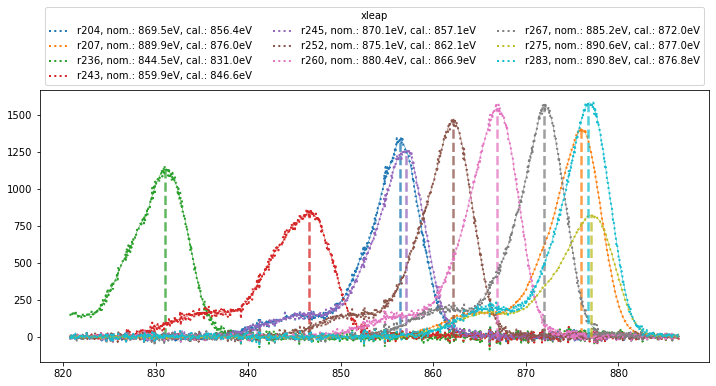

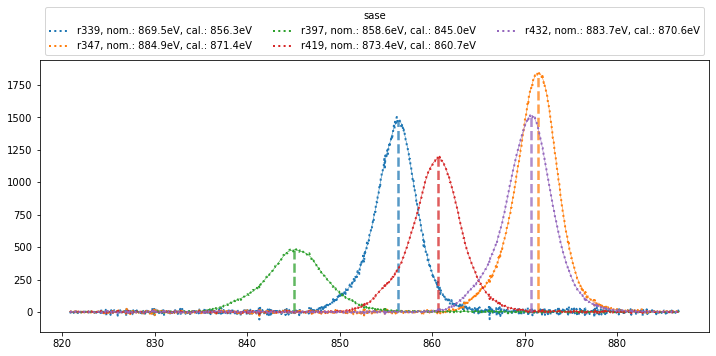

In [39]:
from scipy import signal


def px2ev(px, scale, offset):
    return px*scale + offset


def filter_savgol(y, window_length=29, polyorder=3):
    return signal.savgol_filter(y, window_length=window_length, polyorder=polyorder)


xs = np.arange(1024)+1
skip_runs = [294, 446, 284, 224, 349]

for pulse_cat in ['xleap', 'sase']:

    fig = plt.figure(figsize=(12,5))
    plt.subplot(111)
    ax = plt.gca()

    # od[pulse_cat+'_calib_data'] = {}
    od[pulse_cat+'_calib_data']['calib'] = {}
    od[pulse_cat+'_calib_data']['calib']['spectrum'] = {}
    od[pulse_cat+'_calib_data']['calib']['spectrum_savgol'] = {}
    od[pulse_cat+'_calib_data']['calib']['max_pos'] = {}
    od[pulse_cat+'_calib_data']['calib']['max_val'] = {}
    od[pulse_cat+'_calib_data']['calib']['hv_nominal'] = {}
    od[pulse_cat+'_calib_data']['calib']['hv_calib'] = {}

    for run, entry in spectra[pulse_cat].items():
        if run in skip_runs:
            continue

        hv_nominal = spectra[pulse_cat][run]['hv_nominal']
        spec = spectra[pulse_cat][run]['spectrum']
        spec_savgol = filter_savgol(spec, window_length=29)
        # spec_filt = gaussian_filter(spec_savgol, 5)
        # gaussian_filter(b[io], 2)
        # spec_savgol = filter_savgol(spec)
        max_pos = np.argmax(spec_savgol)
        max_val = np.max(spec_savgol)

        scale = od[pulse_cat+'_calib_data']['ev_per_px']
        offset = od[pulse_cat+'_calib_data']['ev_offset']

        hv = px2ev(xs, scale, offset)
        hv_calib = px2ev(max_pos, scale, offset)

        spectra[pulse_cat][run]['spectrum_savgol'] = spec_savgol
        spectra[pulse_cat][run]['max_pos'] = max_pos
        spectra[pulse_cat][run]['max_val'] = max_val
        spectra[pulse_cat][run]['hv_calib'] = hv_calib

        od[pulse_cat+'_calib_data']['calib']['spectrum'][run] = spec
        od[pulse_cat+'_calib_data']['calib']['spectrum_savgol'][run] = spec_savgol
        od[pulse_cat+'_calib_data']['calib']['max_pos'][run] = max_pos
        od[pulse_cat+'_calib_data']['calib']['max_val'][run] = max_val
        od[pulse_cat+'_calib_data']['calib']['hv_nominal'][run] = hv_nominal
        od[pulse_cat+'_calib_data']['calib']['hv_calib'][run] = hv_calib

        hv_calib_weighted = np.nansum(spec_savgol * hv) / np.nansum(spec_savgol)
        # hv_calib_weighted = px2ev(max_weighted, scale, offset)
        # print(hv_calib_weighted)

        # plt.plot(hv, spec, label="r{:d}, nom.: {:.1f}eV, cal.: {:.1f}eV".format(
        #     run, hv_nominal, hv_calib))
        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(hv, spec, ':', c=color, lw=2,
                 label="r{:d}, nom.: {:.1f}eV, cal.: {:.1f}eV".format(
            run, hv_nominal, hv_calib))
        plt.plot(hv, spec_savgol, '-', c=color, lw=.5)
            #      label="r{:d}, nom.: {:.1f}eV, cal.: {:.1f}eV".format(
            # run, hv_nominal, hv_calib)) #, label="r{:d}, nom.: {:.1f}eV, cal.: {:.1f}eV".format(
            # # run, hv_nominal, hv_calib))
        plt.vlines(hv_calib, 0, max_val,
                colors=color, lw=2.5, ls='--', alpha=0.75)

    plt.legend(title=pulse_cat,
               bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)
# key_array = []
# run_array = []
# spec_array = []
# hv_array = []

# for pulse_cat in ['xleap', 'sase']:
#     spectra
#     for keys in spectra[pulse_cat].keys():
#         key, run = keys
#         spec = spectra[pulse_cat][keys]
#         key_array.append(key)
#         run_array.append(run)
#         spec_array.append(spec)
#         hv_array.append(hv)
#         plt.plot(spec, label="r{:03d}: {}".format(run, key))

#     plt.legend()



hv_calib = hv * 0.9898 - 4.52
hv_calib = hv * 1.0000 - 13.44
hv_calib = hv * 1.0062 - 18.65
hv_calib = hv * 1.0000 - 13.21


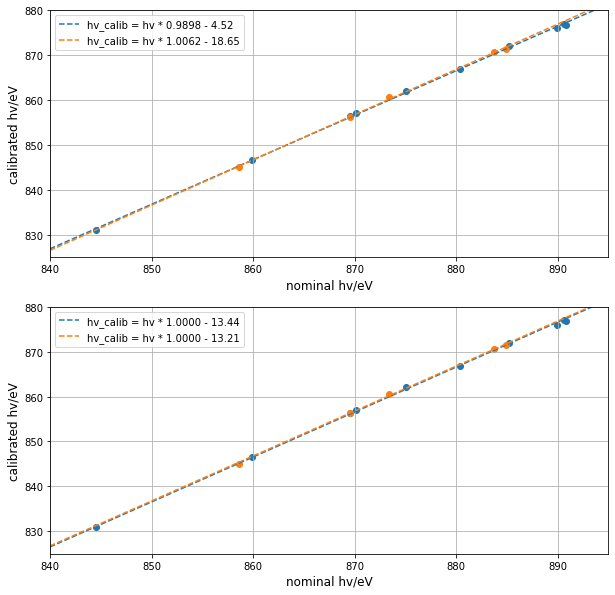

In [40]:
def line_offset(x, offs):
    return x + offs

hv = np.arange(800,1000)

fig, ax = plt.subplots(2,1,figsize=(10,10))
# plt.subplot(111)
# ax = plt.gca()

for pulse_cat in ['xleap', 'sase']:

    calib = od[pulse_cat+'_calib_data']['calib']
    length = len(calib['hv_calib'])
    run_list = [run for run in calib['hv_calib'].keys()]
    hv_calib = [hv_calib for _,hv_calib in calib['hv_calib'].items()]
    hv_nominal = [hv_calib for _,hv_calib in calib['hv_nominal'].items()]

    popt, pcov = curve_fit(line, hv_nominal, hv_calib)
    offset = popt[1]
    scale = popt[0]

    popt2, pcov2 = curve_fit(line_offset, hv_nominal, hv_calib)
    offset2 = popt2[0]
    scale2 = 1

    lbl = "hv_calib = hv * {:.4f} {} {:.2f}".format(scale, "+" if offset > 0 else "-", np.abs(offset))
    print(lbl)
    lbl2 = "hv_calib = hv * {:.4f} {} {:.2f}".format(scale2, "+" if offset2 > 0 else "-", np.abs(offset2))
    print(lbl2)

    ax[0].scatter(hv_nominal, hv_calib)
    ax[0].plot(hv, hv*scale + offset, '--', label=lbl)
    ax[1].scatter(hv_nominal, hv_calib)
    ax[1].plot(hv, hv*scale2 + offset2, '--', label=lbl2)


for a in ax:
    a.legend()
    a.set_xlabel('nominal hv/eV',fontsize=12)
    a.set_ylabel('calibrated hv/eV',fontsize=12)
    a.set_xlim(840,895)
    a.set_ylim(825,880)
    a.grid(True)

# BACKUP (old code)

sase, run_out:339, run_in:340
sase, run_out:347, run_in:344
xleap, run_out:204, run_in:205
xleap, run_out:207, run_in:206


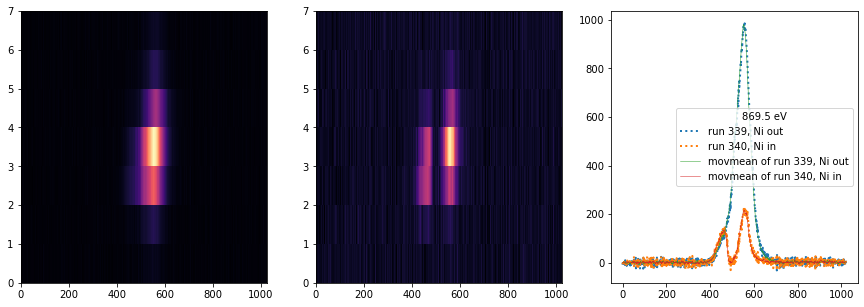

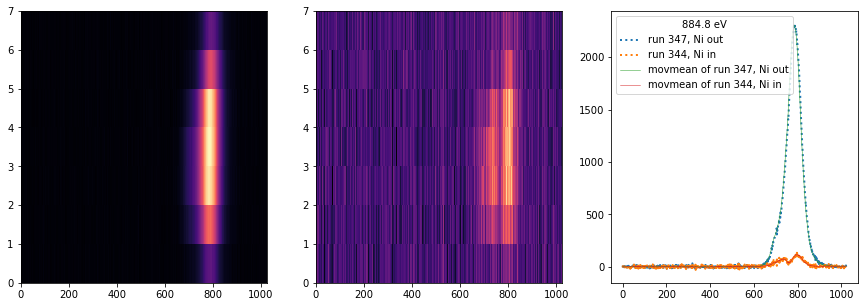

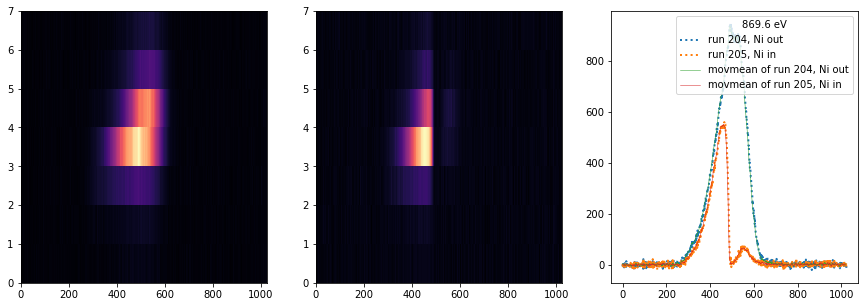

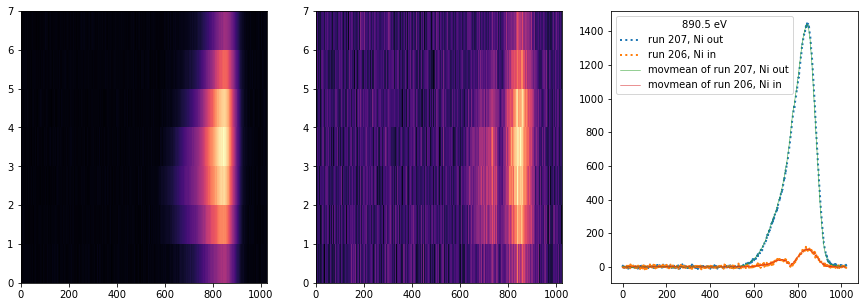

In [2]:
# from lv17analysis import helpers

# nmax = 200
# k_movmean = 5
# cmap = 'magma'
# opal_dict = {}
# pad_px = 4

# for pulse_cat in ['sase', 'xleap']:
#     runs_ni_out = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_out']
#     runs_ni_in = lv17data.spectrometer_run_dict[pulse_cat+'_calib_ni_in']
#     hv_nominal = lv17data.spectrometer_run_dict[pulse_cat+'_calib_nominal_energy']

#     opal_dict[pulse_cat+'_calib_ni_out'] = {}
#     opal_dict[pulse_cat+'_calib_ni_out'][0] = {}
#     opal_dict[pulse_cat+'_calib_ni_out'][1] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'][0] = {}
#     opal_dict[pulse_cat+'_calib_ni_in'][1] = {}

#     for i_run, run_out in enumerate(runs_ni_out):
#         opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#         center_px = opal.get_center_px(opal_img)
#         roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#         spec = opal.spec_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#         spec_movmean = helpers.movmean(spec, k=k_movmean)
#         # hv = hv_nominal[i_run]
#         opal_dict[pulse_cat+'_calib_ni_out'][i_run] = {
#             'run': run_out,
#             'opal_img': opal_img,
#             'center_px': center_px,
#             'roi_img': roi_img,
#             'spectrum': spec,
#             'spectrum_movmean': spec_movmean,
#             'nominal_energy': hv_mean}

#         run_in = runs_ni_in[i_run]
#         opal_img, hv_mean = opal.run_mean(run_in, nmax=nmax)
#         roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#         spec_movmean = helpers.movmean(spec, k=k_movmean)
#         opal_dict[pulse_cat+'_calib_ni_in'][i_run] = {
#             'run': run_in,
#             'opal_img': opal_img,
#             'center_px': center_px,
#             'roi_img': roi_img,
#             'spectrum': spec,
#             'spectrum_movmean': spec_movmean,
#             'nominal_energy': hv_mean}

#         print("{}, run_out:{:d}, run_in:{:d}".format(pulse_cat, run_out, run_in))

#         fig = plt.figure(figsize=(10,5))
#         fig.add_subplot(1,3,1)
#         plt.pcolormesh(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['roi_img'], cmap=cmap)
#         fig.add_subplot(1,3,2)
#         plt.pcolormesh(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['roi_img'], cmap=cmap)
#         fig.add_subplot(1,3,3)
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['spectrum'], ':', lw=2,
#                  label="run {:d}, Ni out".format(run_out))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['spectrum'], ':', lw=2,
#                  label="run {:d}, Ni in".format(run_in))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_out'][i_run]['spectrum_movmean'], '-', lw=.5,
#                  label="movmean of run {:d}, Ni out".format(run_out))
#         plt.plot(opal_dict[pulse_cat+'_calib_ni_in'][i_run]['spectrum_movmean'], '-', lw=.5,
#                  label="movmean of run {:d}, Ni in".format(run_in))
#         plt.legend(title="{:.1f} eV".format(hv_nominal[i_run]))


## OLD: Load Images from psana datasource (slow)

776
777
780
782


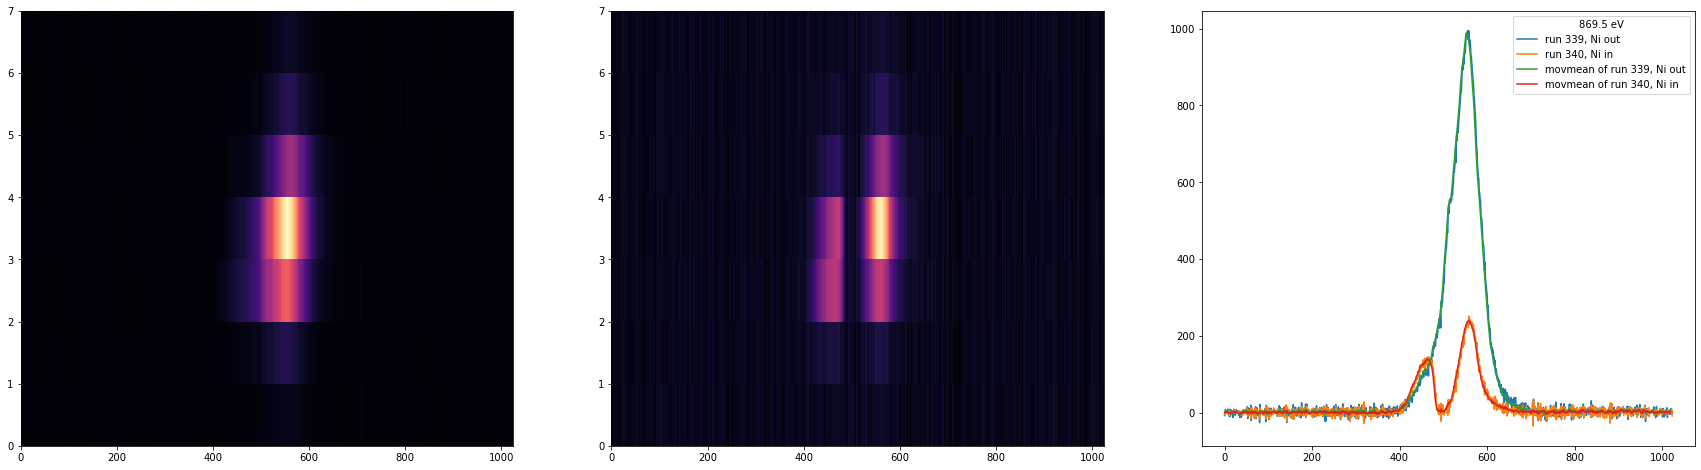

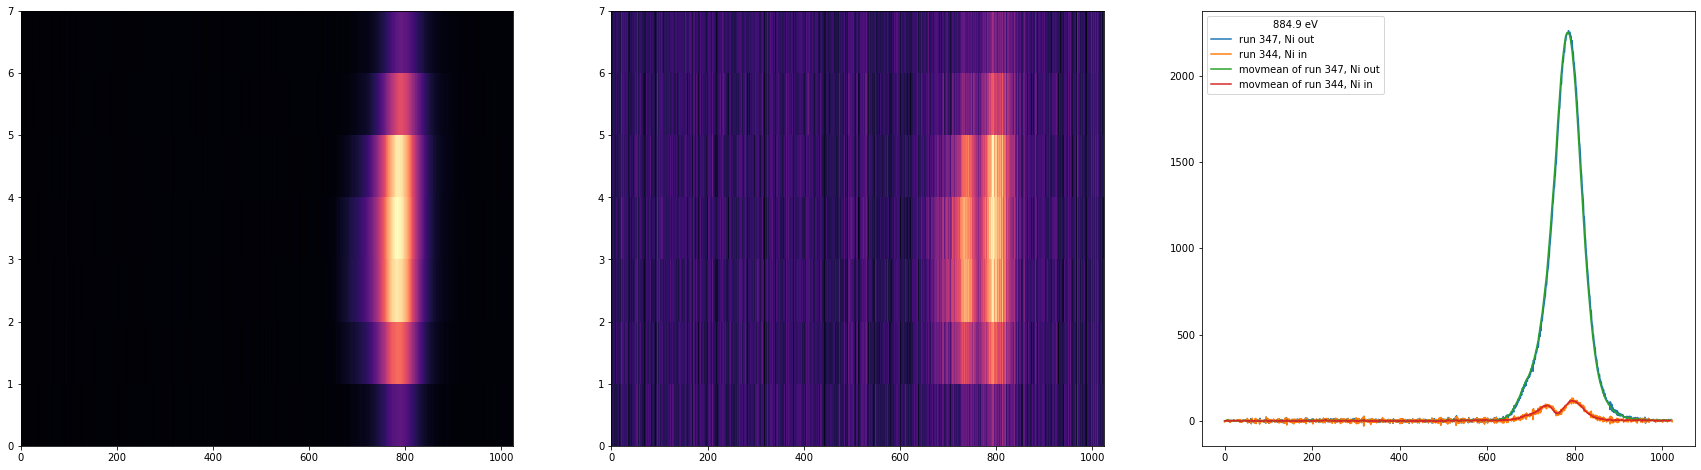

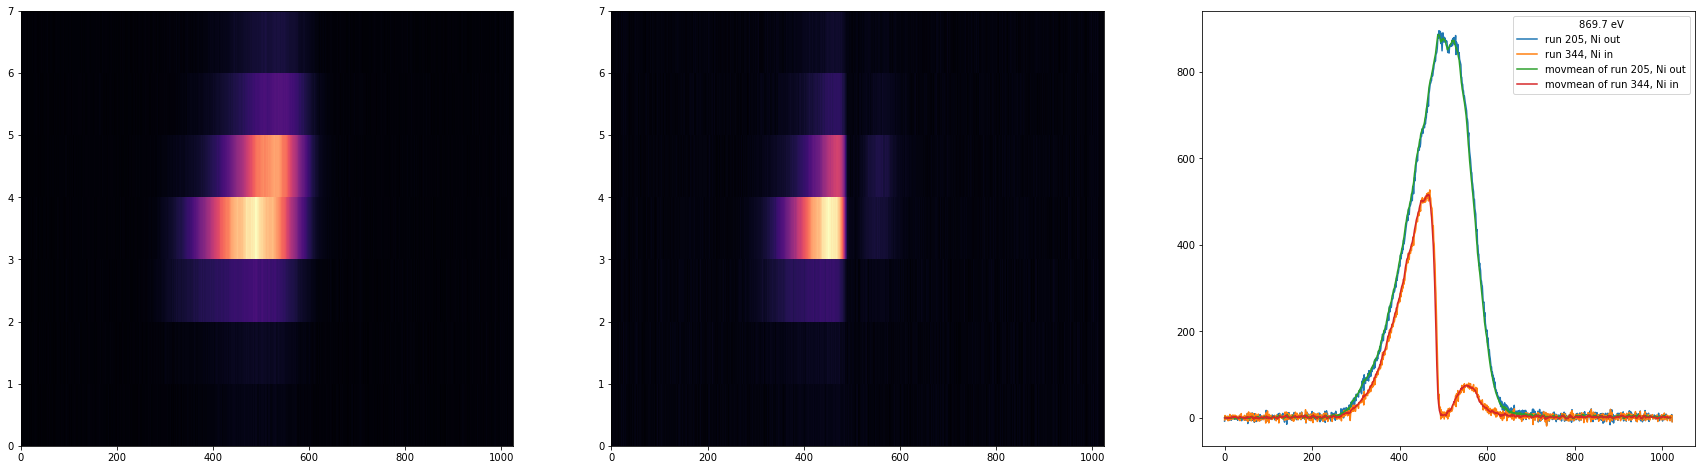

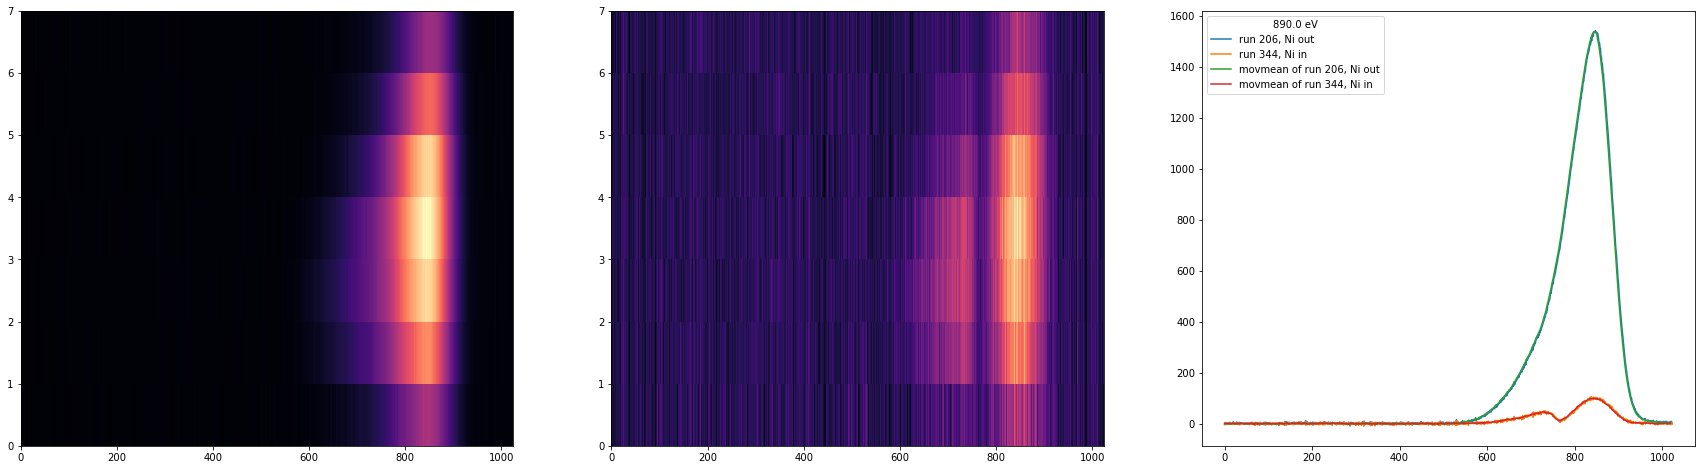

In [3]:
# from lv17analysis import helpers

# k_movmean = 5
# cmap = 'magma'
# pad_px = 4

# # SASE
# runs_ni_out = lv17data.spectrometer_run_dict['sase_calib_ni_out']
# runs_ni_in = lv17data.spectrometer_run_dict['sase_calib_ni_in']
# # nominal_energies = lv17data.spectrometer_run_dict['sase_calib_nominal_energy']

# opal_dict = {}
# opal_dict['sase_calib_ni_out'] = {}
# opal_dict['sase_calib_ni_out'][0] = {}
# opal_dict['sase_calib_ni_out'][1] = {}
# opal_dict['sase_calib_ni_in'] = {}
# opal_dict['sase_calib_ni_in'][0] = {}
# opal_dict['sase_calib_ni_in'][1] = {}

# opal_dict['xleap_calib_ni_out'] = {}
# opal_dict['xleap_calib_ni_out'][0] = {}
# opal_dict['xleap_calib_ni_out'][1] = {}
# opal_dict['xleap_calib_ni_in'] = {}
# opal_dict['xleap_calib_ni_in'][0] = {}
# opal_dict['xleap_calib_ni_in'][1] = {}

# for i_run, run_out in enumerate(runs_ni_out):
#     opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#     center_px = opal.get_center_px(opal_img)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px)
#     spec_movmean = helpers.movmean(spec, k=k_movmean)
#     # hv = nominal_energies[i_run]
#     hv = hv_mean
#     opal_dict['sase_calib_ni_out'][i_run] = {
#         'run': run_out,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'spectrum_movmean': spec_movmean,
#         'nominal_energy': hv}

#     run_in = runs_ni_in[i_run]
#     opal_img, hv_mean = opal.run_mean(run_in, nmax=nmax)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px)
#     spec_movmean = helpers.movmean(spec, k=k_movmean)
#     opal_dict['sase_calib_ni_in'][i_run] = {
#         'run': run_in,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'spectrum_movmean': spec_movmean,
#         'nominal_energy': hv}

#     print(center_px)

#     fig = plt.figure(figsize=(30,8))
#     fig.add_subplot(1,3,1)
#     plt.pcolormesh(opal_dict['sase_calib_ni_out'][i_run]['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,2)
#     plt.pcolormesh(opal_dict['sase_calib_ni_in'][i_run]['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,3)
#     plt.plot(opal_dict['sase_calib_ni_out'][i_run]['spectrum'],
#              label="run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['sase_calib_ni_in'][i_run]['spectrum'],
#              label="run {:d}, Ni in".format(run_in))
#     plt.plot(opal_dict['sase_calib_ni_out'][i_run]['spectrum_movmean'],
#              label="movmean of run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['sase_calib_ni_in'][i_run]['spectrum_movmean'],
#              label="movmean of run {:d}, Ni in".format(run_in))
#     plt.legend(title="{:.1f} eV".format(hv))


# # XLEAP
# runs_ni_out = lv17data.spectrometer_run_dict['xleap_calib_ni_out']
# runs_ni_in = lv17data.spectrometer_run_dict['xleap_calib_ni_in']
# # nominal_energies = lv17data.spectrometer_run_dict['xleap_calib_nominal_energy']

# for i_run, run_out in enumerate(runs_ni_out):
#     opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#     center_px = opal.get_center_px(opal_img)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px)
#     spec_movmean = helpers.movmean(spec, k=k_movmean)
#     # hv = nominal_energies[i_run]
#     hv = hv_mean
#     opal_dict['xleap_calib_ni_out'][i_run] = {
#         'run': run_out,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'spectrum_movmean': spec_movmean,
#         'nominal_energy': hv}

#     run_out = runs_ni_in[i_run]
#     opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px)
#     spec_movmean = helpers.movmean(spec, k=k_movmean)
#     opal_dict['xleap_calib_ni_in'][i_run] = {
#         'run': run_in,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'spectrum_movmean': spec_movmean,
#         'nominal_energy': hv}

#     print(center_px)

#     fig = plt.figure(figsize=(30,8))
#     fig.add_subplot(1,3,1)
#     plt.pcolormesh(opal_dict['xleap_calib_ni_out'][i_run]['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,2)
#     plt.pcolormesh(opal_dict['xleap_calib_ni_in'][i_run]['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,3)
#     plt.plot(opal_dict['xleap_calib_ni_out'][i_run]['spectrum'],
#              label="run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['xleap_calib_ni_in'][i_run]['spectrum'],
#              label="run {:d}, Ni in".format(run_in))
#     plt.plot(opal_dict['xleap_calib_ni_out'][i_run]['spectrum_movmean'],
#              label="movmean of run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['xleap_calib_ni_in'][i_run]['spectrum_movmean'],
#              label="movmean of run {:d}, Ni in".format(run_in))
#     plt.legend(title="{:.1f} eV".format(hv))

776
777
780
782


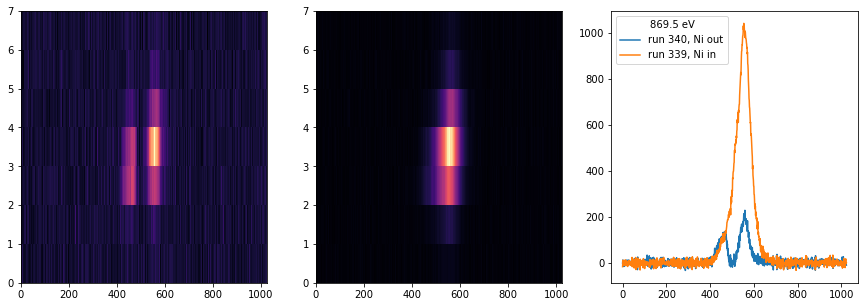

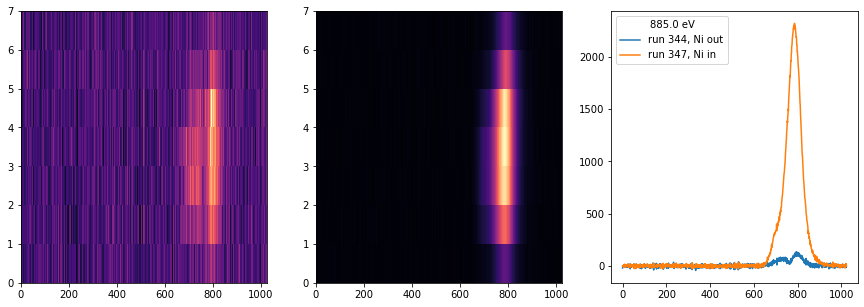

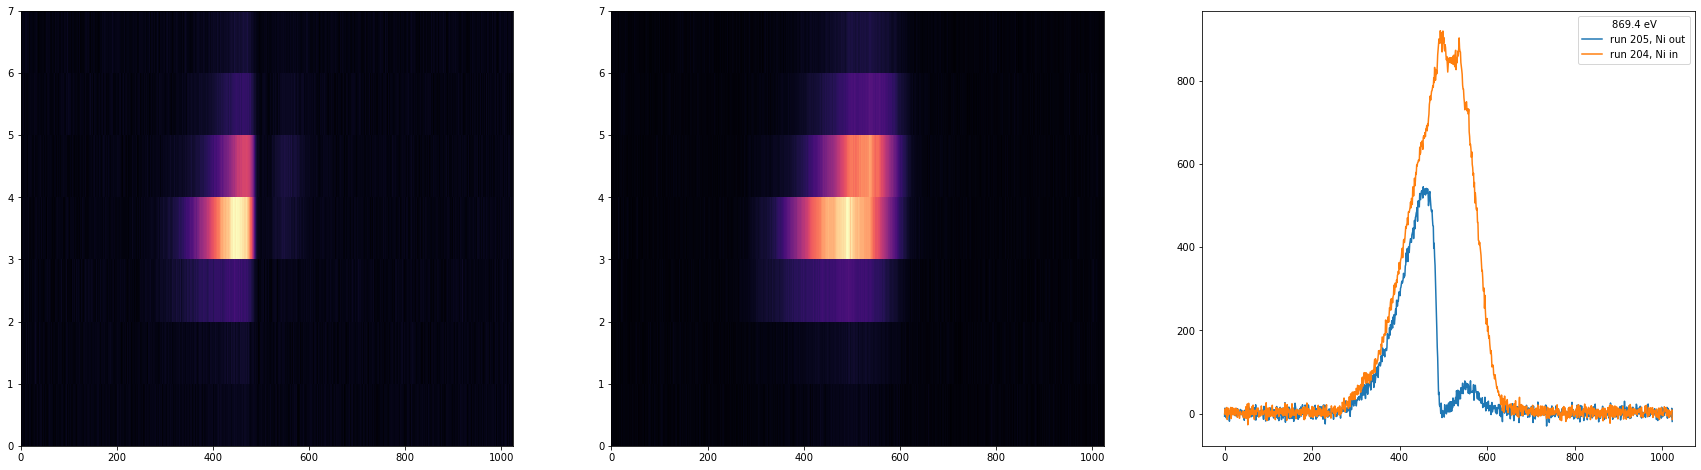

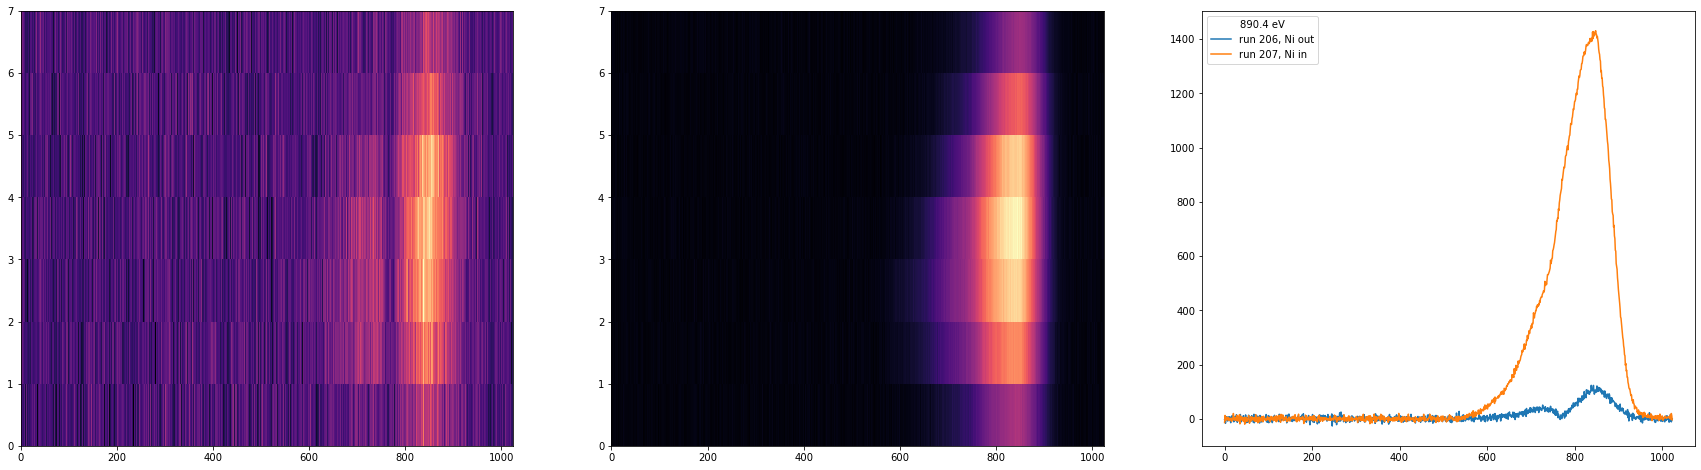

In [3]:
##timeit

# cmap = 'magma'
# nmax = 100
# pad_px = 4



# # SASE
# runs_ni_out = lv17data.spectrometer_run_dict['sase_calib_ni_out']
# runs_ni_in = lv17data.spectrometer_run_dict['sase_calib_ni_in']
# # nominal_energies = lv17data.spectrometer_run_dict['sase_calib_nominal_energy']

# opal_dict = {}

# for i_run, run_in in enumerate(runs_ni_out):
#     opal_img, hv_mean = opal.run_mean(run_in, nmax=nmax)
#     center_px = opal.get_center_px(opal_img)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     # hv = nominal_energies[i_run]
#     hv = hv_mean
#     opal_dict['sase_calib_ni_in'] = {
#         'run': run_in,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'nominal_energy': hv}

#     run_out = runs_ni_in[i_run]
#     opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     opal_dict['sase_calib_ni_out'] = {
#         'run': run_out,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'nominal_energy': hv}

#     print(center_px)

#     fig = plt.figure(figsize=(15,5))
#     fig.add_subplot(1,3,1)
#     plt.pcolormesh(opal_dict['sase_calib_ni_out']['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,2)
#     plt.pcolormesh(opal_dict['sase_calib_ni_in']['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,3)
#     plt.plot(opal_dict['sase_calib_ni_out']['spectrum'],
#              label="run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['sase_calib_ni_in']['spectrum'],
#              label="run {:d}, Ni in".format(run_in))
#     plt.legend(title="{:.1f} eV".format(hv))



# # XLEAP
# runs_ni_out = lv17data.spectrometer_run_dict['xleap_calib_ni_out']
# runs_ni_in = lv17data.spectrometer_run_dict['xleap_calib_ni_in']
# # nominal_energies = lv17data.spectrometer_run_dict['xleap_calib_nominal_energy']

# opal_dict = {}

# for i_run, run_in in enumerate(runs_ni_out):
#     opal_img, hv_mean = opal.run_mean(run_in, nmax=nmax)
#     center_px = opal.get_center_px(opal_img)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     # hv = nominal_energies[i_run]
#     hv = hv_mean
#     opal_dict['xleap_calib_ni_in'] = {
#         'run': run_in,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'nominal_energy': hv}

#     run_out = runs_ni_in[i_run]
#     opal_img, hv_mean = opal.run_mean(run_out, nmax=nmax)
#     roi_img = opal.roi_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     spec = opal.spec_from_img(opal_img, center_px=center_px, pax_px=pad_px)
#     opal_dict['xleap_calib_ni_out'] = {
#         'run': run_out,
#         'opal_img': opal_img,
#         'center_px': center_px,
#         'roi_img': roi_img,
#         'spectrum': spec,
#         'nominal_energy': hv}

#     print(center_px)

#     fig = plt.figure(figsize=(30,8))
#     fig.add_subplot(1,3,1)
#     plt.pcolormesh(opal_dict['xleap_calib_ni_out']['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,2)
#     plt.pcolormesh(opal_dict['xleap_calib_ni_in']['roi_img'], cmap=cmap)
#     fig.add_subplot(1,3,3)
#     plt.plot(opal_dict['xleap_calib_ni_out']['spectrum'],
#              label="run {:d}, Ni out".format(run_out))
#     plt.plot(opal_dict['xleap_calib_ni_in']['spectrum'],
#              label="run {:d}, Ni in".format(run_in))
#     plt.legend(title="{:.1f} eV".format(hv))